# **Student Study Performance** By Ashton Koerner

 [[**Dataset**](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance?resource=downloadhttps://) from Kaggle,  [**Github**](https://github.com/ashtonkoerner/Student_Study_Performance_Report.git)]

 This dataset deals with student study performance across gender, races/ethniticy, parental level of education, if they had a standard or free/reduced school lunch, if they completed a test preparation course, and scores for tests on subjects of math, reading, and writing.


*   gender : sex of students -> (Male/female)
*   race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
*   parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)
*   lunch : having lunch before test (standard or free/reduced)
*   test preparation course : complete or not complete before test
*   math score
*   reading score
*   writing score

What I examine:
1.   What is the average score for each subject?
2.   How many students completed the preparation course?
3.   What percentage of male vs female students completed the preparation course?
4.   Is there a correlation between completion of the test preparation and test scores? Does this relationship differ based on parental level of education?
5.   How do the scores vary across different parental education levels and gender?
6.   Can we create a table of average test scores for math, reading, and writing across each sex?
7.   Is there a correlation between race/ethnicity and subject scores?
8.   Are there equal distributions of parental level of education across races/ethnicities?



**Purpose:** I want to understand how student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. As a college student, I find this topic intriguing for the purposes of furthering my own studying performance.

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import seaborn as sns
import io

In [6]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving study_performance.csv to study_performance (2).csv


In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. What is the average score for each subject (math, reading, writing)?

In [ ]:
avg_scores = df[['math_score', 'reading_score', 'writing_score']].mean()
print("Average math Score:", avg_scores['math_score'])
print("Average reading Score:", avg_scores['reading_score'])
print("Average writing Score:", avg_scores['writing_score'])

Average math Score: 66.089
Average reading Score: 69.169
Average writing Score: 68.054


2. How many students completed the test preparation course and how many did not?

In [ ]:
test_prep_counts = df['test_preparation_course'].value_counts()
print("Completed Test Preparation Course:", test_prep_counts['completed'])
print("Did Not Complete Test Preparation Course:", test_prep_counts['none'])

Completed Test Preparation Course: 358
Did Not Complete Test Preparation Course: 642


3. What percentage of male vs female students completed the test preparation course?

In [13]:
completed_course = df[df['test_preparation_course'] == 'completed'].groupby('gender').size()
percentage_completed_by_gender = ((completed_course / df['gender'].value_counts()) * 100).round(1)
print("Percentage of male vs. female students who completed the test preparation course:")
print(percentage_completed_by_gender)

Percentage of male vs. female students who completed the test preparation course:
gender
female    35.5
male      36.1
dtype: float64


From this, we find that about equal percentages of each gender completed the test preparation course. This possibly indicates that gender does not significantly influence the probability a student passes the course or not.

4. Is there a correlation between completion of the test preparation and test scores? Does this relationship differ based on parental level of education?

<Figure size 1000x600 with 0 Axes>

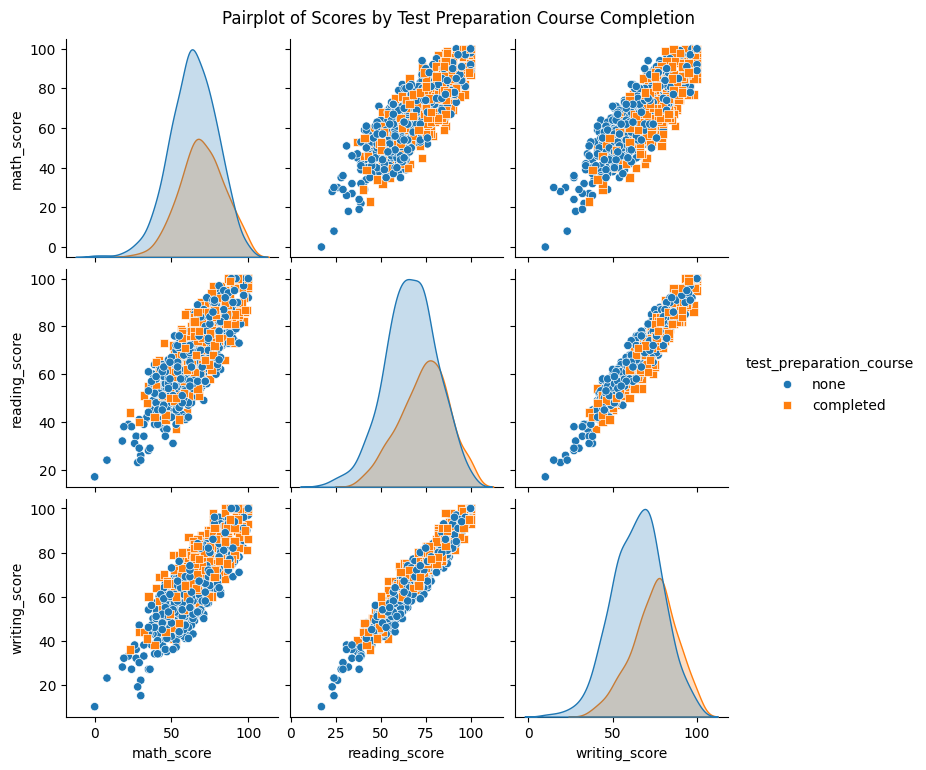

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='test_preparation_course', vars=['math_score', 'reading_score', 'writing_score'], markers=['o', 's'], diag_kind='kde')
plt.suptitle('Pairplot of Scores by Test Preparation Course Completion', y=1.02)
plt.show()

There appears to be a correlation between completion of the test preparation course and scores. However, the nature of this relationship might vary based on parental level of education as indicated by the clustering patterns in the pairplot.

5. How do the scores vary across different parental education levels and gender?


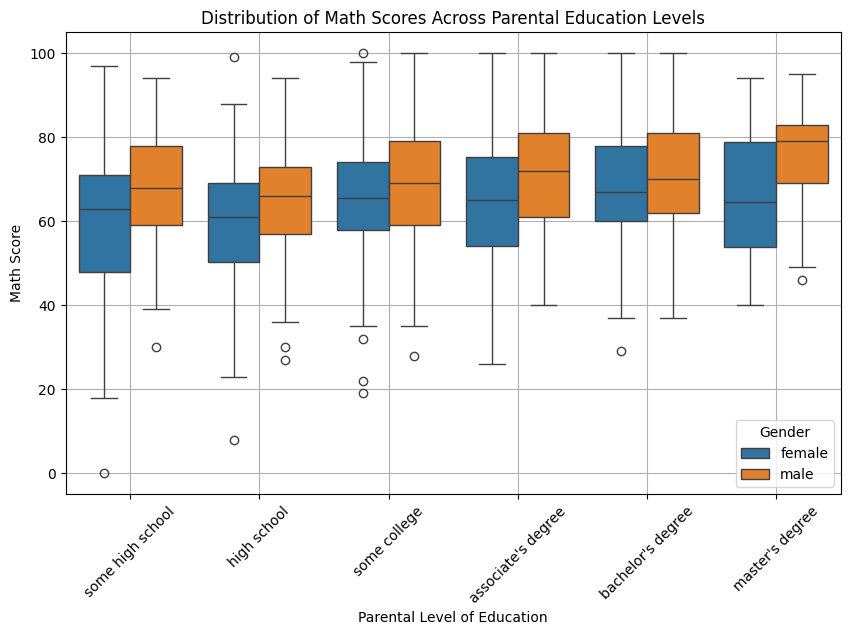

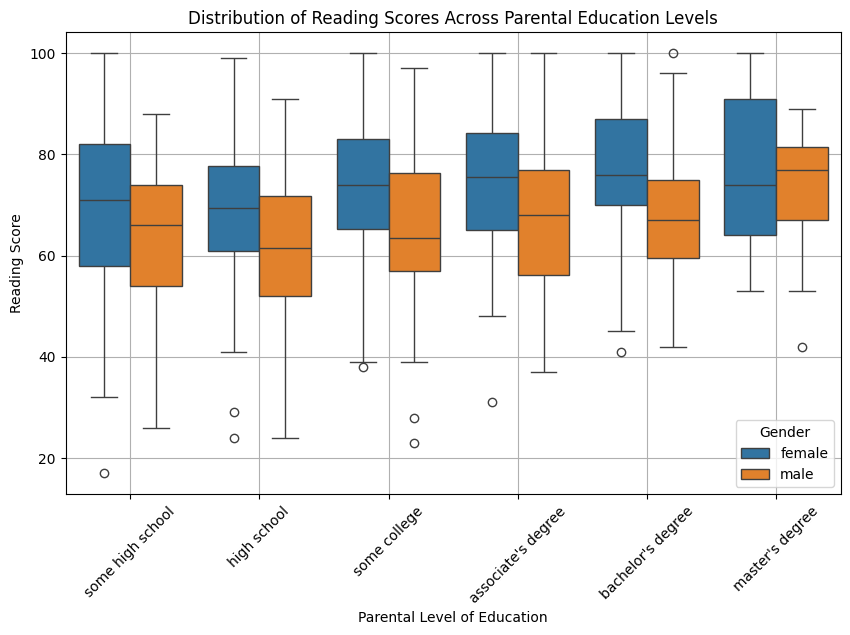

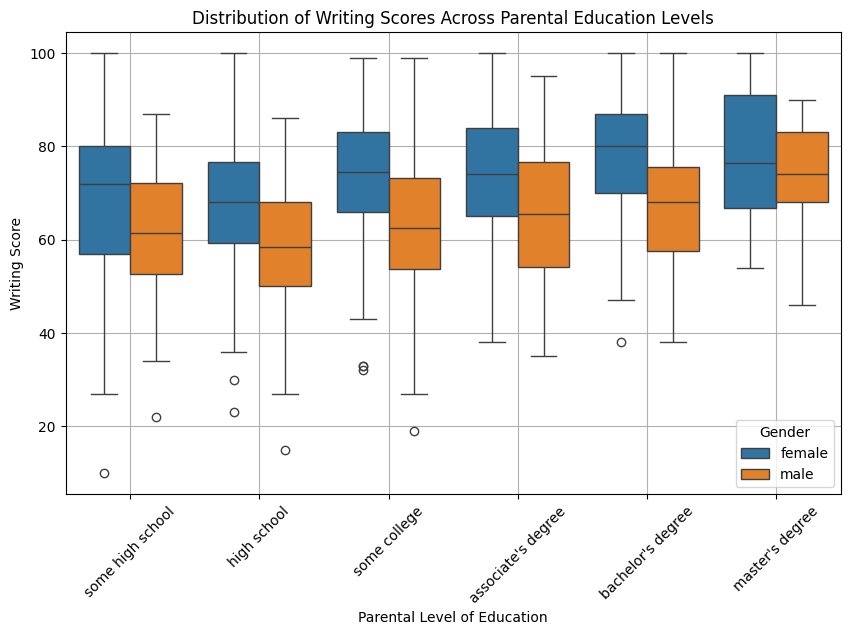

In [17]:
order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='math_score', hue='gender', data=df, order=order)
plt.title('Distribution of Math Scores Across Parental Education Levels')
plt.xlabel('Parental Level of Education')
plt.ylabel('Math Score')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='reading_score', hue='gender', data=df, order=order)
plt.title('Distribution of Reading Scores Across Parental Education Levels')
plt.xlabel('Parental Level of Education')
plt.ylabel('Reading Score')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='writing_score', hue='gender', data=df, order=order)
plt.title('Distribution of Writing Scores Across Parental Education Levels')
plt.xlabel('Parental Level of Education')
plt.ylabel('Writing Score')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

 The boxplots suggest that there are variations in test scores across different parental education levels. Additionally, the inclusion of gender differentiation shows that these variations are influenced by gender as well. For example, male tend to have higher math scores compared to females, while female tend to have higher reading and writing scores.

6. Let us see this concept of gender playing a role in test scores by creating a table of the average test scores for math, reading, and writing across each sex.

In [29]:
average_scores_by_sex = df.pivot_table(index='gender', values=['math_score', 'reading_score', 'writing_score'], aggfunc='mean')
print("Average test scores by sex:\n")
print(average_scores_by_sex)

Average test scores by sex:

        math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


From this table, it is obvious that males have higher average math test scores than females by about 5%, while females have higher average reading and writing scores by about 7% and 9% respectively.

7. Is there a correlation between race/ethnicity and math, reading, and writing scores?

<Figure size 1200x600 with 0 Axes>

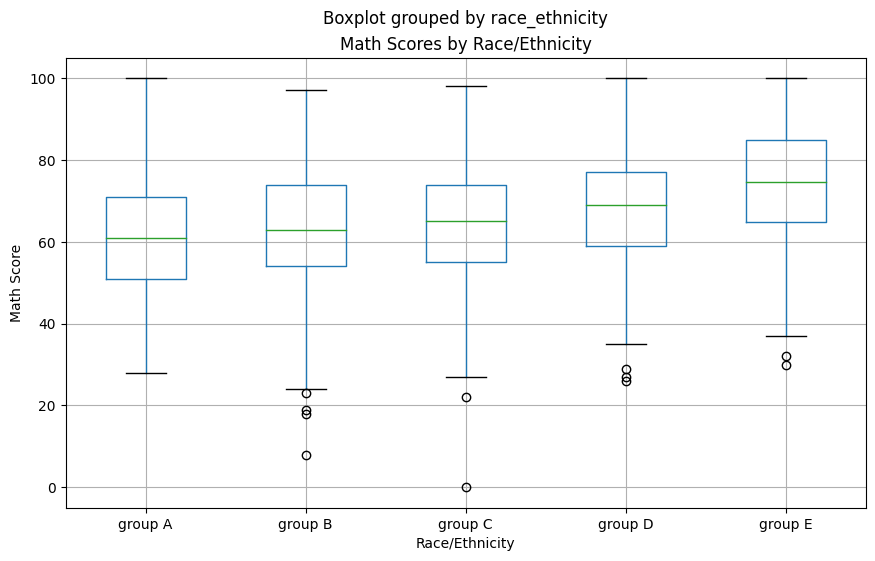

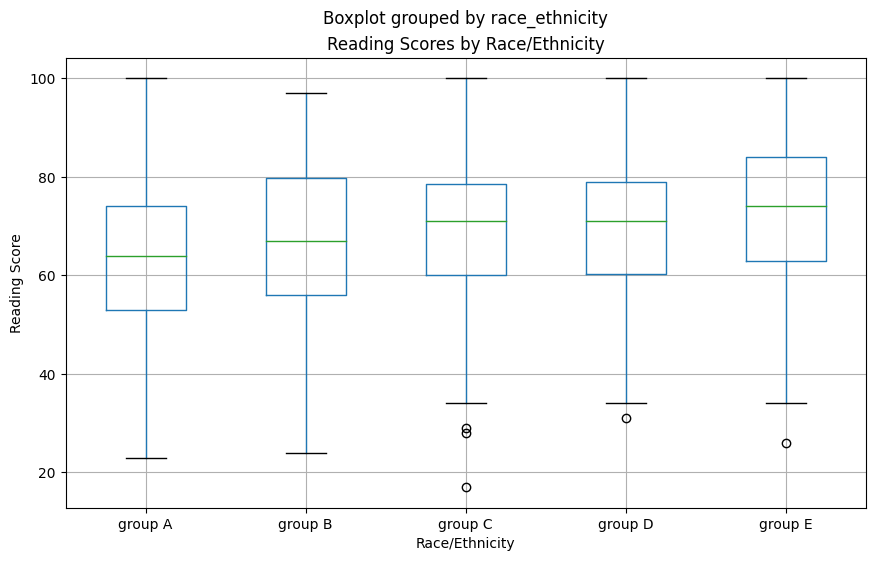

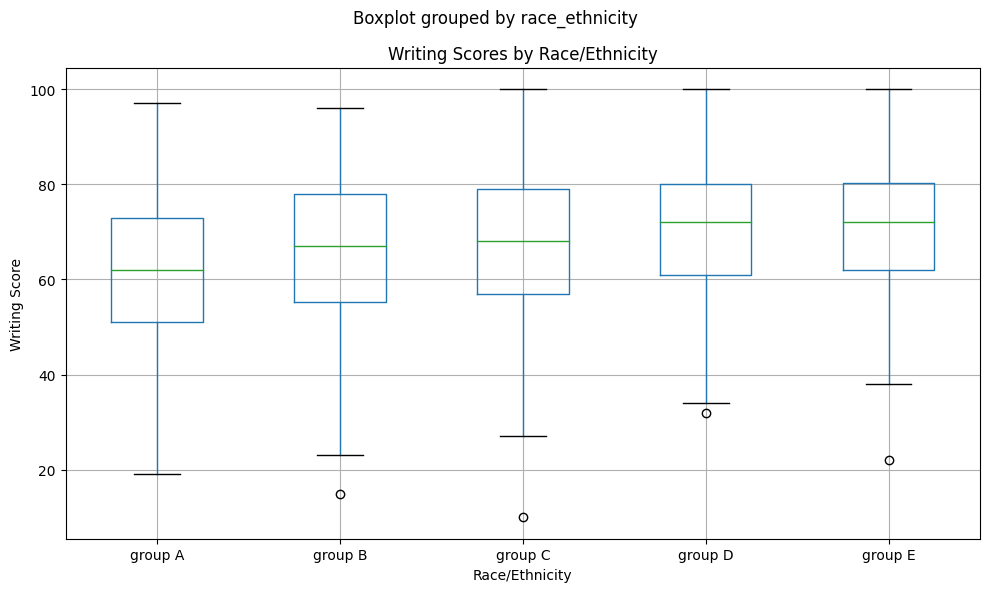

In [ ]:
plt.figure(figsize=(12, 6))

df.boxplot(column='math_score', by='race_ethnicity', figsize=(10, 6))
plt.title('Math Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')

df.boxplot(column='reading_score', by='race_ethnicity', figsize=(10, 6))
plt.title('Reading Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading Score')

df.boxplot(column='writing_score', by='race_ethnicity', figsize=(10, 6))
plt.title('Writing Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()

From the dataset description on kaggle, these groups are not individual races (i.e. white, black, asian). Race refers to the concept of dividing people into groups on the basis of various sets of physical characteristics and the process of ascribing social meaning to those groups, while ethnicity describes the culture of people in a given geographic region, including their language, heritage, religion and customs. Nevertheless, as one continues from race/ethnicity groups A, to  B, to C, etc, test scores across all three subjects increase, seemingly showing that group A tends to have lower test scores tahn group E.

8. Are there equal distributions of parental level of education across races/ethnicities?

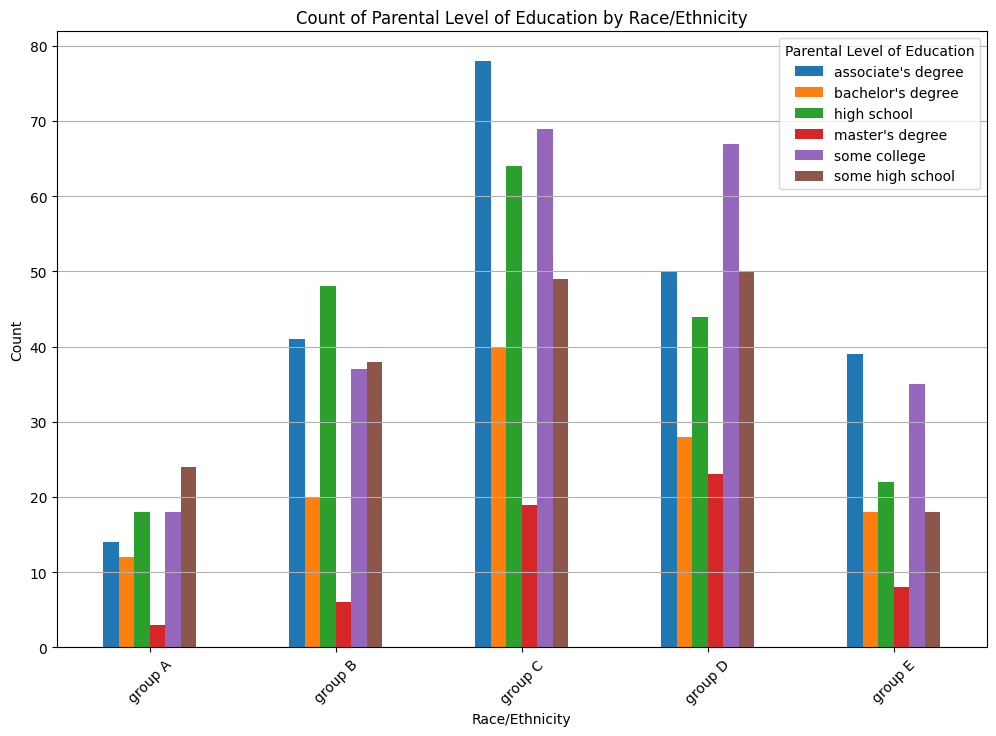

In [14]:
count_table = pd.crosstab(df['race_ethnicity'], df['parental_level_of_education'])

count_table.plot(kind='bar', figsize=(12, 8))
plt.title('Count of Parental Level of Education by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Parental Level of Education')
plt.grid(axis='y')
plt.show()

From this graph, it seems there are not equal distributions of parental level of education across races/ethnicities. This implies a sort of systemic bias or access issue within these communities. However, this is interesting as from the graph in 6. it can be seen that group E tends to have the higher mean test scores. This is in direct contrast to what this graph implies, which is that group C would likely have the best test scores across each race/ethnicity.